__1. Biochemistry & Molecular Biology__ <br/>
__2. Pharmacology & Pharmacy__  <br/>
__3. Mathematics__

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import sys
sys.path.insert(0, "../../code-previous")

In [4]:
import pandas as pd
import numpy as np
import operator


import string
import nltk
stopwords = nltk.corpus.stopwords.words('english')

import operator
from collections import Counter

import pickle
from sklearn.feature_extraction.text import CountVectorizer

import plotly
import plotly.plotly as py
from plotly import tools

import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='sreejith_s', api_key='rcet0rTqFCc3WeOzWTjv')

from tqdm import tqdm
tqdm.pandas(desc="Progress")

import seaborn as sns
sns.set_style('white')
import matplotlib.pylab as plt

In [5]:
filename = "/mnt/disks/vault/analysis-data/interdisciplinary-novelty-analysis/corrected-entropy-analysis/word-journey-data.pql"
data_ = pd.read_pickle(filename)

In [6]:
d1 = "Biochemistry & Molecular Biology"
d2 = "Pharmacology & Pharmacy"
d3 = "Mathematics"

In [7]:
inp1 = data_[data_.Label == d1]
inp2 = data_[data_.Label == d2]
inp3 = data_[data_.Label == d3]

In [8]:
v1 = CountVectorizer()
vw1 = v1.fit_transform(inp1.title_words)

v2 = CountVectorizer()
vw2 = v2.fit_transform(inp2.title_words)

v3 = CountVectorizer()
vw3 = v3.fit_transform(inp3.title_words)

_Biochemistry & Molecular Biology_

In [9]:
cm1 = vw1.toarray()

unqs1 = []
cnts1 = []

for i in range(cm1.shape[0]):
    unique_, counts_tmp = np.unique(cm1[i:i+1,:], return_counts=True)    
    counts_ = list(map(np.log, counts_tmp))
    unqs1.append(unique_)
    cnts1.append(counts_)

In [10]:
yearly_word_frequency_variations1 = []
avg_variations_for_freq1 = []

for index in tqdm(range(cm1.shape[0] - 1)):
    
    # take two consecutive years
    tmp_ = cm1[index:index+2]
    #unique counts for the first year
    unique_counts = np.unique(tmp_[0]) 
    yearly_avg_variations_for_freq = {}
    word_freq_variations = []
    word_freq_variations.append(tmp_[1] - tmp_[0])
    yearly_word_frequency_variations1.append(word_freq_variations)
    
    for uniq in unique_counts:
        # find the indices where the value == uniq
        indices, = np.where(tmp_[0] == uniq)
        # find the values in the next year where those indices are
        # variations of words with that `uniq` count
        transition_values = tmp_[1][indices]
        variations = transition_values - uniq
        # mean variation of words with that `uniq` count
        mean_variation = np.mean(variations)
        # make a list of mean variations
        yearly_avg_variations_for_freq[uniq] = round(mean_variation, 3)
    
    avg_variations_for_freq1.append(yearly_avg_variations_for_freq)

100%|██████████| 116/116 [00:07<00:00,  6.39it/s]


_Pharmacology & Pharmacy_

In [11]:
cm2 = vw2.toarray()

unqs2 = []
cnts2 = []

for i in range(cm1.shape[0]):
    unique_, counts_tmp = np.unique(cm1[i:i+1,:], return_counts=True)    
    counts_ = list(map(np.log, counts_tmp))
    unqs2.append(unique_)
    cnts2.append(counts_)

In [12]:
yearly_word_frequency_variations2 = []
avg_variations_for_freq2 = []

for index in tqdm(range(cm2.shape[0] - 1)):
    
    # take two consecutive years
    tmp_ = cm2[index:index+2]
    #unique counts for the first year
    unique_counts = np.unique(tmp_[0]) 
    yearly_avg_variations_for_freq = {}
    word_freq_variations = []
    word_freq_variations.append(tmp_[1] - tmp_[0])
    yearly_word_frequency_variations2.append(word_freq_variations)
    
    for uniq in unique_counts:
        # find the indices where the value == uniq
        indices, = np.where(tmp_[0] == uniq)
        # find the values in the next year where those indices are
        # variations of words with that `uniq` count
        transition_values = tmp_[1][indices]
        variations = transition_values - uniq
        # mean variation of words with that `uniq` count
        mean_variation = np.mean(variations)
        # make a list of mean variations
        yearly_avg_variations_for_freq[uniq] = round(mean_variation, 3)
    
    avg_variations_for_freq2.append(yearly_avg_variations_for_freq)

100%|██████████| 116/116 [00:04<00:00, 10.20it/s]


_Mathematics_

In [13]:
cm3 = vw3.toarray()

unqs3 = []
cnts3 = []

for i in range(cm1.shape[0]):
    unique_, counts_tmp = np.unique(cm1[i:i+1,:], return_counts=True)    
    counts_ = list(map(np.log, counts_tmp))
    unqs3.append(unique_)
    cnts3.append(counts_)

In [14]:
yearly_word_frequency_variations3 = []
avg_variations_for_freq3 = []

for index in tqdm(range(cm3.shape[0] - 1)):
    
    # take two consecutive years
    tmp_ = cm3[index:index+2]
    #unique counts for the first year
    unique_counts = np.unique(tmp_[0]) 
    yearly_avg_variations_for_freq = {}
    word_freq_variations = []
    word_freq_variations.append(tmp_[1] - tmp_[0])
    yearly_word_frequency_variations3.append(word_freq_variations)
    
    for uniq in unique_counts:
        # find the indices where the value == uniq
        indices, = np.where(tmp_[0] == uniq)
        # find the values in the next year where those indices are
        # variations of words with that `uniq` count
        transition_values = tmp_[1][indices]
        variations = transition_values - uniq
        # mean variation of words with that `uniq` count
        mean_variation = np.mean(variations)
        # make a list of mean variations
        yearly_avg_variations_for_freq[uniq] = round(mean_variation, 3)
    
    avg_variations_for_freq3.append(yearly_avg_variations_for_freq)

100%|██████████| 116/116 [00:01<00:00, 29.10it/s]


In [1]:
K = 3
f = plt.figure(figsize=(18,13))


year = 1975
N = 75

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax = f.add_subplot(331)
ax.scatter(X1, Y1, alpha=0.5)
ax.scatter(X2, Y2, alpha=0.5)
ax.scatter(X3, Y3, alpha=0.5)
ax.set_xlabel("Variation")
ax.set_ylabel("Probability")
ax.set_title(str(year) + "Word Variations")
ax.legend()



year = 1976
N = 76

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax2 = f.add_subplot(332)
ax2.scatter(X1, Y1, alpha=0.5)
ax2.scatter(X2, Y2, alpha=0.5)
ax2.scatter(X3, Y3, alpha=0.5)
ax2.set_xlabel("Variation")
ax2.set_ylabel("Probability")
ax2.set_title(str(year) + "Word Variations")
ax2.legend()



year = 1977
N = 77

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax3 = f.add_subplot(333)
ax3.scatter(X1, Y1, alpha=0.5)
ax3.scatter(X2, Y2, alpha=0.5)
ax3.scatter(X3, Y3, alpha=0.5)
ax3.set_xlabel("Variation")
ax3.set_ylabel("Probability")
ax3.set_title(str(year) + "Word Variations")
ax3.legend()



year = 1978
N = 78

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax4 = f.add_subplot(334)
ax4.scatter(X1, Y1, alpha=0.5)
ax4.scatter(X2, Y2, alpha=0.5)
ax4.scatter(X3, Y3, alpha=0.5)
ax4.set_xlabel("Variation")
ax4.set_ylabel("Probability")
ax4.set_title(str(year) + "Word Variations")
ax4.legend()


year = 1979
N = 79

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax5 = f.add_subplot(335)
ax5.scatter(X1, Y1, alpha=0.5)
ax5.scatter(X2, Y2, alpha=0.5)
ax5.scatter(X3, Y3, alpha=0.5)
ax5.set_xlabel("Variation")
ax5.set_ylabel("Probability")
ax5.set_title(str(year) + "Word Variations")
ax5.legend()


year = 1980
N = 80

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax6 = f.add_subplot(336)
ax6.scatter(X1, Y1, alpha=0.5)
ax6.scatter(X2, Y2, alpha=0.5)
ax6.scatter(X3, Y3, alpha=0.5)
ax6.set_xlabel("Variation")
ax6.set_ylabel("Probability")
ax6.set_title(str(year) + "Word Variations")
ax6.legend()

NameError: name 'plt' is not defined

No handles with labels found to put in legend.


370 words with 7 counts
269 words with 7 counts
137 words with 7 counts


No handles with labels found to put in legend.


354 words with 7 counts
304 words with 7 counts
143 words with 7 counts


No handles with labels found to put in legend.


348 words with 7 counts
306 words with 7 counts
149 words with 7 counts


No handles with labels found to put in legend.


325 words with 7 counts
300 words with 7 counts
156 words with 7 counts


No handles with labels found to put in legend.


359 words with 7 counts
286 words with 7 counts
144 words with 7 counts


No handles with labels found to put in legend.


379 words with 7 counts
290 words with 7 counts
169 words with 7 counts


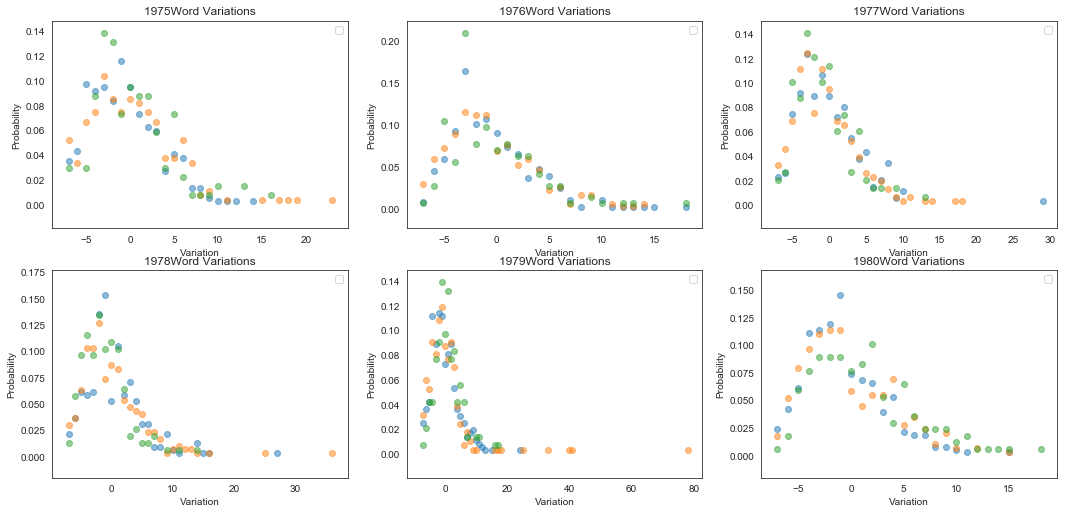

In [17]:
K = 7
f = plt.figure(figsize=(18,13))


year = 1975
N = 75

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax = f.add_subplot(331)
ax.scatter(X1, Y1, alpha=0.5)
ax.scatter(X2, Y2, alpha=0.5)
ax.scatter(X3, Y3, alpha=0.5)
ax.set_xlabel("Variation")
ax.set_ylabel("Probability")
ax.set_title(str(year) + "Word Variations")
ax.legend()



year = 1976
N = 76

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax2 = f.add_subplot(332)
ax2.scatter(X1, Y1, alpha=0.5)
ax2.scatter(X2, Y2, alpha=0.5)
ax2.scatter(X3, Y3, alpha=0.5)
ax2.set_xlabel("Variation")
ax2.set_ylabel("Probability")
ax2.set_title(str(year) + "Word Variations")
ax2.legend()



year = 1977
N = 77

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax3 = f.add_subplot(333)
ax3.scatter(X1, Y1, alpha=0.5)
ax3.scatter(X2, Y2, alpha=0.5)
ax3.scatter(X3, Y3, alpha=0.5)
ax3.set_xlabel("Variation")
ax3.set_ylabel("Probability")
ax3.set_title(str(year) + "Word Variations")
ax3.legend()



year = 1978
N = 78

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax4 = f.add_subplot(334)
ax4.scatter(X1, Y1, alpha=0.5)
ax4.scatter(X2, Y2, alpha=0.5)
ax4.scatter(X3, Y3, alpha=0.5)
ax4.set_xlabel("Variation")
ax4.set_ylabel("Probability")
ax4.set_title(str(year) + "Word Variations")
ax4.legend()


year = 1979
N = 79

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax5 = f.add_subplot(335)
ax5.scatter(X1, Y1, alpha=0.5)
ax5.scatter(X2, Y2, alpha=0.5)
ax5.scatter(X3, Y3, alpha=0.5)
ax5.set_xlabel("Variation")
ax5.set_ylabel("Probability")
ax5.set_title(str(year) + "Word Variations")
ax5.legend()


year = 1980
N = 80

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax6 = f.add_subplot(336)
ax6.scatter(X1, Y1, alpha=0.5)
ax6.scatter(X2, Y2, alpha=0.5)
ax6.scatter(X3, Y3, alpha=0.5)
ax6.set_xlabel("Variation")
ax6.set_ylabel("Probability")
ax6.set_title(str(year) + "Word Variations")
ax6.legend()

No handles with labels found to put in legend.


179 words with 10 counts
138 words with 10 counts
80 words with 10 counts


No handles with labels found to put in legend.


208 words with 10 counts
163 words with 10 counts
88 words with 10 counts


No handles with labels found to put in legend.


214 words with 10 counts
142 words with 10 counts
84 words with 10 counts


No handles with labels found to put in legend.


227 words with 10 counts
167 words with 10 counts
76 words with 10 counts
216 words with 10 counts


No handles with labels found to put in legend.


174 words with 10 counts
83 words with 10 counts
218 words with 10 counts


No handles with labels found to put in legend.


178 words with 10 counts
72 words with 10 counts


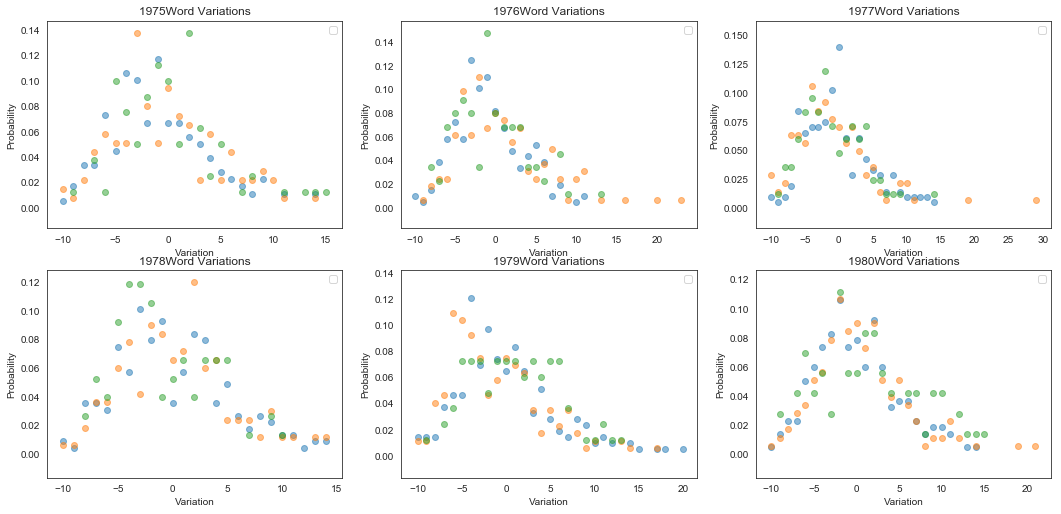

In [18]:
K = 10
f = plt.figure(figsize=(18,13))


year = 1975
N = 75

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax = f.add_subplot(331)
ax.scatter(X1, Y1, alpha=0.5)
ax.scatter(X2, Y2, alpha=0.5)
ax.scatter(X3, Y3, alpha=0.5)
ax.set_xlabel("Variation")
ax.set_ylabel("Probability")
ax.set_title(str(year) + "Word Variations")
ax.legend()



year = 1976
N = 76

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax2 = f.add_subplot(332)
ax2.scatter(X1, Y1, alpha=0.5)
ax2.scatter(X2, Y2, alpha=0.5)
ax2.scatter(X3, Y3, alpha=0.5)
ax2.set_xlabel("Variation")
ax2.set_ylabel("Probability")
ax2.set_title(str(year) + "Word Variations")
ax2.legend()



year = 1977
N = 77

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax3 = f.add_subplot(333)
ax3.scatter(X1, Y1, alpha=0.5)
ax3.scatter(X2, Y2, alpha=0.5)
ax3.scatter(X3, Y3, alpha=0.5)
ax3.set_xlabel("Variation")
ax3.set_ylabel("Probability")
ax3.set_title(str(year) + "Word Variations")
ax3.legend()



year = 1978
N = 78

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax4 = f.add_subplot(334)
ax4.scatter(X1, Y1, alpha=0.5)
ax4.scatter(X2, Y2, alpha=0.5)
ax4.scatter(X3, Y3, alpha=0.5)
ax4.set_xlabel("Variation")
ax4.set_ylabel("Probability")
ax4.set_title(str(year) + "Word Variations")
ax4.legend()


year = 1979
N = 79

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax5 = f.add_subplot(335)
ax5.scatter(X1, Y1, alpha=0.5)
ax5.scatter(X2, Y2, alpha=0.5)
ax5.scatter(X3, Y3, alpha=0.5)
ax5.set_xlabel("Variation")
ax5.set_ylabel("Probability")
ax5.set_title(str(year) + "Word Variations")
ax5.legend()


year = 1980
N = 80

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax6 = f.add_subplot(336)
ax6.scatter(X1, Y1, alpha=0.5)
ax6.scatter(X2, Y2, alpha=0.5)
ax6.scatter(X3, Y3, alpha=0.5)
ax6.set_xlabel("Variation")
ax6.set_ylabel("Probability")
ax6.set_title(str(year) + "Word Variations")
ax6.legend()

No handles with labels found to put in legend.


120 words with 13 counts
92 words with 13 counts
49 words with 13 counts


No handles with labels found to put in legend.


128 words with 13 counts
96 words with 13 counts
55 words with 13 counts


No handles with labels found to put in legend.


124 words with 13 counts
99 words with 13 counts
57 words with 13 counts
131 words with 13 counts


No handles with labels found to put in legend.


101 words with 13 counts
58 words with 13 counts
140 words with 13 counts


No handles with labels found to put in legend.


102 words with 13 counts
57 words with 13 counts
134 words with 13 counts


No handles with labels found to put in legend.


98 words with 13 counts
64 words with 13 counts


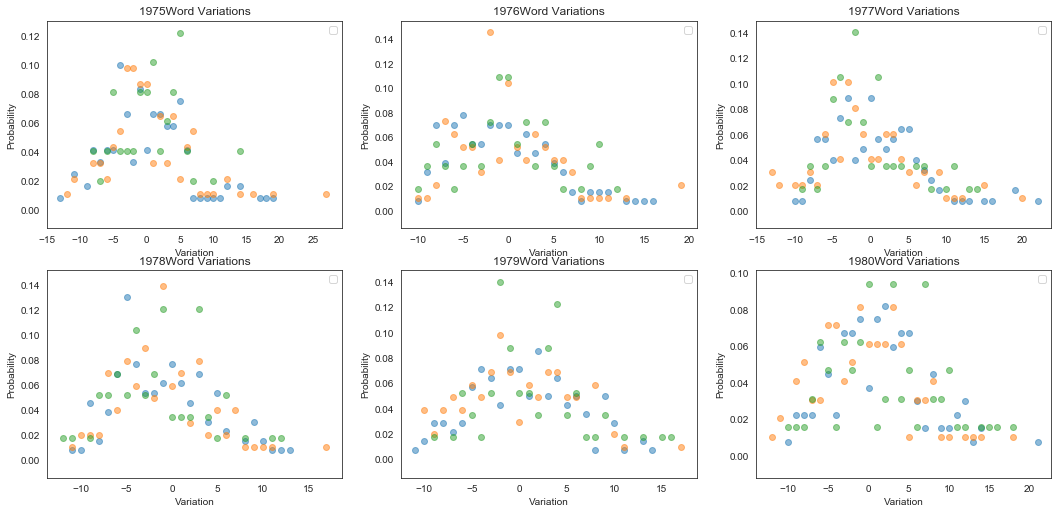

In [19]:
K = 13
f = plt.figure(figsize=(18,13))


year = 1975
N = 75

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax = f.add_subplot(331)
ax.scatter(X1, Y1, alpha=0.5)
ax.scatter(X2, Y2, alpha=0.5)
ax.scatter(X3, Y3, alpha=0.5)
ax.set_xlabel("Variation")
ax.set_ylabel("Probability")
ax.set_title(str(year) + "Word Variations")
ax.legend()



year = 1976
N = 76

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax2 = f.add_subplot(332)
ax2.scatter(X1, Y1, alpha=0.5)
ax2.scatter(X2, Y2, alpha=0.5)
ax2.scatter(X3, Y3, alpha=0.5)
ax2.set_xlabel("Variation")
ax2.set_ylabel("Probability")
ax2.set_title(str(year) + "Word Variations")
ax2.legend()



year = 1977
N = 77

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax3 = f.add_subplot(333)
ax3.scatter(X1, Y1, alpha=0.5)
ax3.scatter(X2, Y2, alpha=0.5)
ax3.scatter(X3, Y3, alpha=0.5)
ax3.set_xlabel("Variation")
ax3.set_ylabel("Probability")
ax3.set_title(str(year) + "Word Variations")
ax3.legend()



year = 1978
N = 78

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax4 = f.add_subplot(334)
ax4.scatter(X1, Y1, alpha=0.5)
ax4.scatter(X2, Y2, alpha=0.5)
ax4.scatter(X3, Y3, alpha=0.5)
ax4.set_xlabel("Variation")
ax4.set_ylabel("Probability")
ax4.set_title(str(year) + "Word Variations")
ax4.legend()


year = 1979
N = 79

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax5 = f.add_subplot(335)
ax5.scatter(X1, Y1, alpha=0.5)
ax5.scatter(X2, Y2, alpha=0.5)
ax5.scatter(X3, Y3, alpha=0.5)
ax5.set_xlabel("Variation")
ax5.set_ylabel("Probability")
ax5.set_title(str(year) + "Word Variations")
ax5.legend()


year = 1980
N = 80

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax6 = f.add_subplot(336)
ax6.scatter(X1, Y1, alpha=0.5)
ax6.scatter(X2, Y2, alpha=0.5)
ax6.scatter(X3, Y3, alpha=0.5)
ax6.set_xlabel("Variation")
ax6.set_ylabel("Probability")
ax6.set_title(str(year) + "Word Variations")
ax6.legend()